In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
price2017 <- read.csv('../input/singapore-hdb-flat-resale-prices-19902020/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [3]:
head(price2017)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>
1,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000
2,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000
3,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000
4,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000
5,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000
6,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68,New Generation,1981,63 years,275000


In [4]:
summary(price2017)

    month               town            flat_type            block          
 Length:80374       Length:80374       Length:80374       Length:80374      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 street_name        storey_range       floor_area_sqm    flat_model       
 Length:80374       Length:80374       Min.   : 31.00   Length:80374      
 Class :character   Class :character   1st Qu.: 82.00   Class :character  
 Mode  :character   Mode  :character   Median : 95.00   Mode  :character  
                                       Mean   : 97.62                     
                                       3rd Qu.:113.00                     
           

In [5]:
unique(price2017$flat_type)

[1] "2 ROOM"           "3 ROOM"           "4 ROOM"           "5 ROOM"          
[5] "EXECUTIVE"        "1 ROOM"           "MULTI-GENERATION"

In [6]:
unique(price2017$town)

[1] "ANG MO KIO"      "BEDOK"           "BISHAN"          "BUKIT BATOK"    
 [5] "BUKIT MERAH"     "BUKIT PANJANG"   "BUKIT TIMAH"     "CENTRAL AREA"   
 [9] "CHOA CHU KANG"   "CLEMENTI"        "GEYLANG"         "HOUGANG"        
[13] "JURONG EAST"     "JURONG WEST"     "KALLANG/WHAMPOA" "MARINE PARADE"  
[17] "PASIR RIS"       "PUNGGOL"         "QUEENSTOWN"      "SEMBAWANG"      
[21] "SENGKANG"        "SERANGOON"       "TAMPINES"        "TOA PAYOH"      
[25] "WOODLANDS"       "YISHUN"

In [7]:
unique(price2017$storey_range)

[1] "10 TO 12" "01 TO 03" "04 TO 06" "07 TO 09" "13 TO 15" "19 TO 21"
 [7] "22 TO 24" "16 TO 18" "34 TO 36" "28 TO 30" "37 TO 39" "49 TO 51"
[13] "25 TO 27" "40 TO 42" "31 TO 33" "46 TO 48" "43 TO 45"

In [8]:
unique(price2017$flat_model)

[1] "Improved"               "New Generation"         "DBSS"                  
 [4] "Standard"               "Apartment"              "Simplified"            
 [7] "Model A"                "Premium Apartment"      "Adjoined flat"         
[10] "Model A-Maisonette"     "Maisonette"             "Type S1"               
[13] "Type S2"                "Model A2"               "Terrace"               
[16] "Improved-Maisonette"    "Premium Maisonette"     "Multi Generation"      
[19] "Premium Apartment Loft" "2-room"

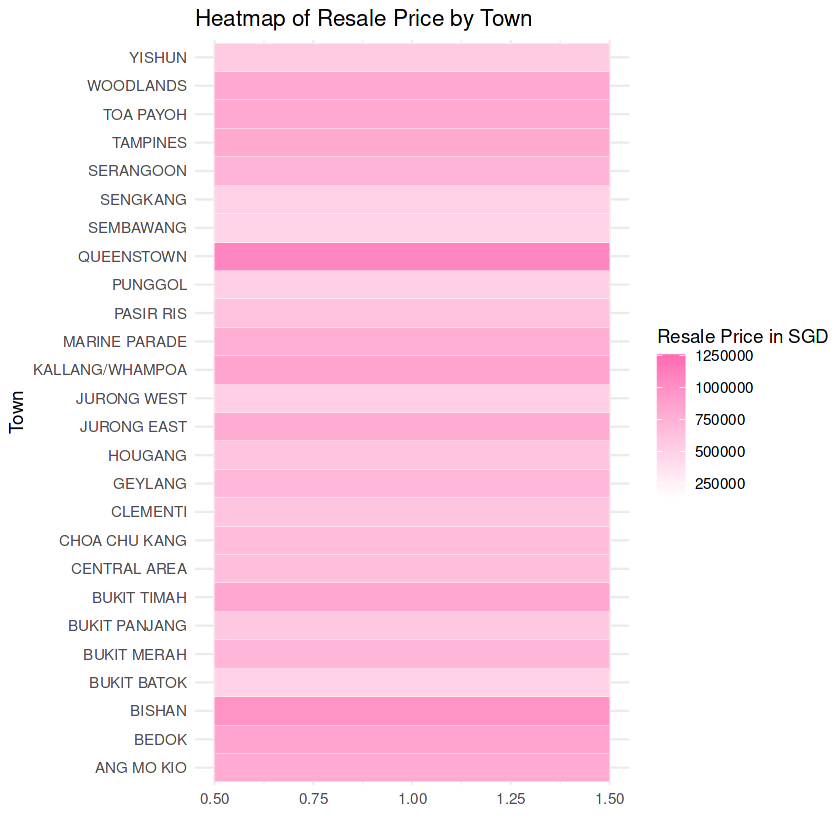

In [9]:
price2017$resale_price <- as.numeric(price2017$resale_price)

ggplot(price2017, aes(x = 1, y = town)) +
  geom_tile(aes(fill = resale_price), color = "white") +
  scale_fill_gradient(low = "white", high = "#FF69B4") + 
  labs(title = "Heatmap of Resale Price by Town",
       x = "",
       y = "Town",
       fill = "Resale Price in SGD") +
  theme_minimal()

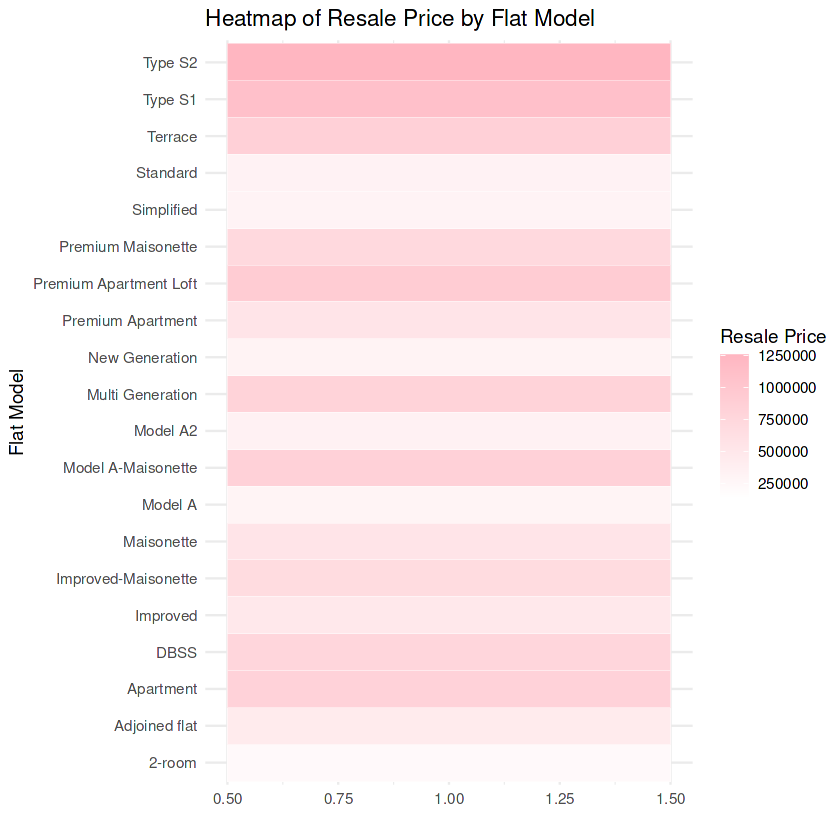

In [10]:
ggplot(price2017, aes(x = 1, y = flat_model)) +
  geom_tile(aes(fill = resale_price), color = "white") +
  scale_fill_gradient(low = "white", high = "#FFB6C1") + 
  labs(title = "Heatmap of Resale Price by Flat Model",
       x = "",
       y = "Flat Model",
       fill = "Resale Price") +
  theme_minimal()

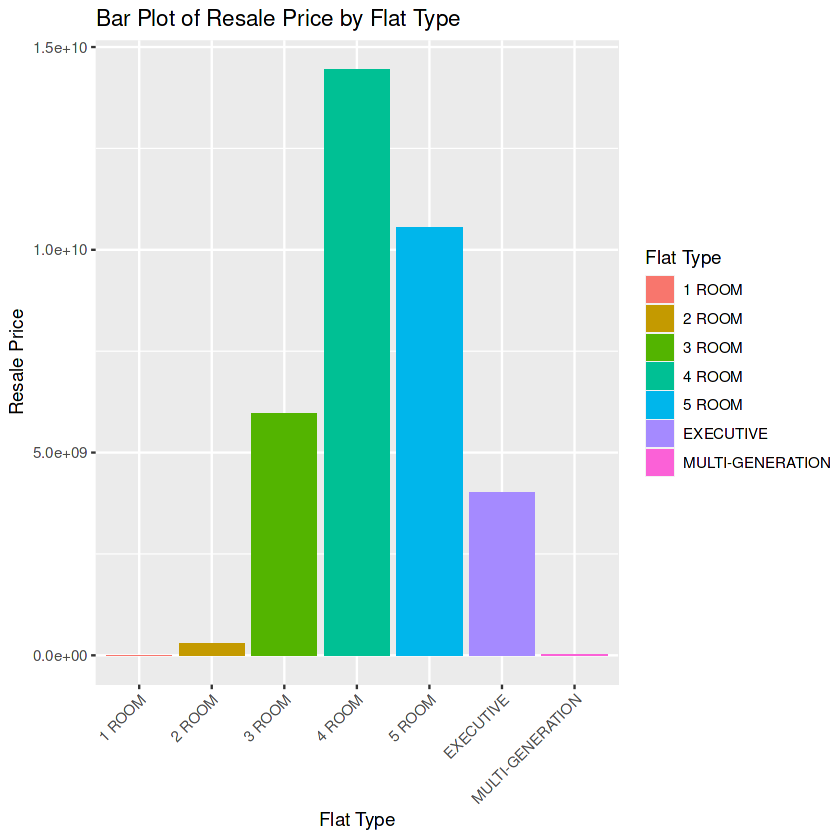

In [11]:
ggplot(price2017, aes(x = flat_type, y = resale_price, fill = flat_type)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of Resale Price by Flat Type",
       x = "Flat Type",
       y = "Resale Price",
       fill = "Flat Type") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

1. Resale prices are higher for 4 room flats

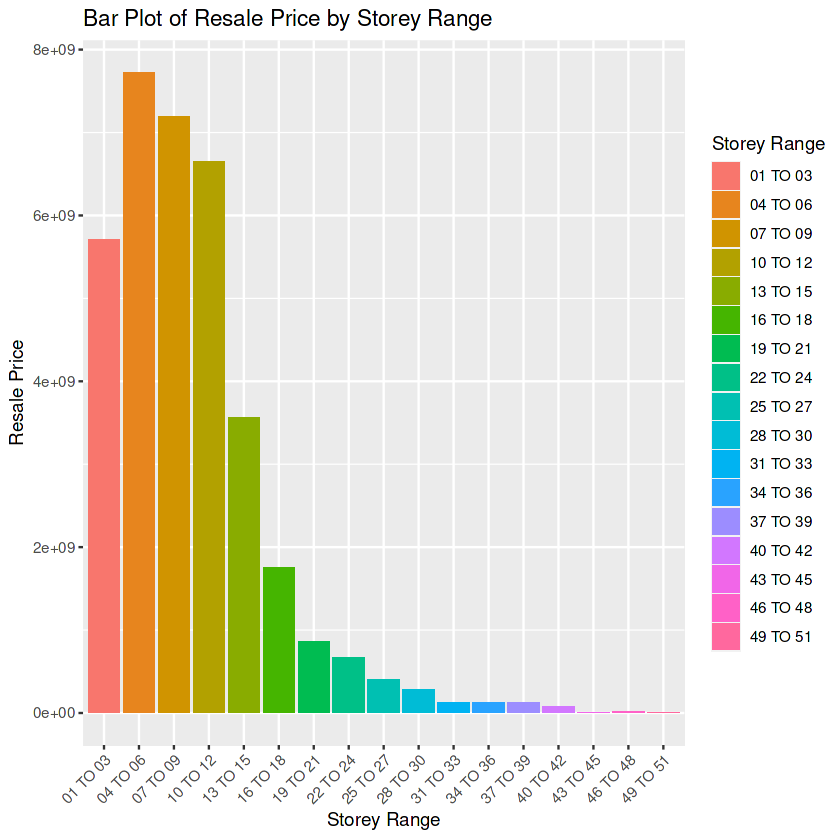

In [12]:
ggplot(price2017, aes(x = storey_range, y = resale_price, fill = storey_range)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of Resale Price by Storey Range",
       x = "Storey Range",
       y = "Resale Price",
       fill = "Storey Range") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

1. Storeys 01-03 and above 13 have lower resale prices
2. Data is left-skewed, potentially due to the lack of flats with greater than 18 storeys

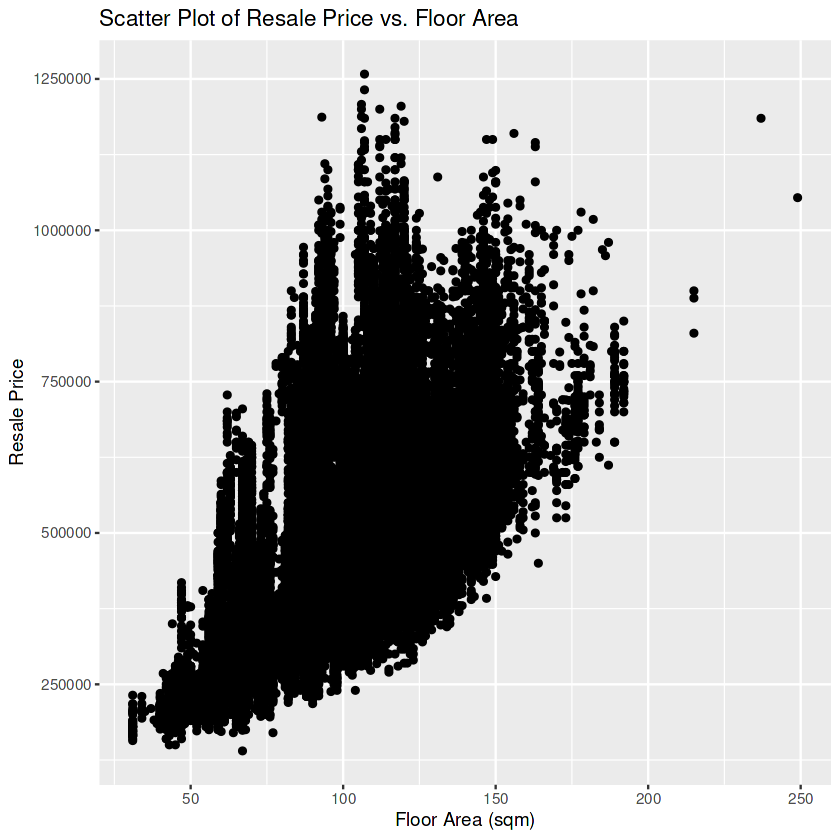

In [13]:
ggplot(price2017, aes(x = floor_area_sqm, y = resale_price)) +
  geom_point() +
  labs(title = "Scatter Plot of Resale Price vs. Floor Area",
       x = "Floor Area (sqm)",
       y = "Resale Price")

Somewhat linear relationship, price increases as floor area sqm increases

In [14]:
most_expensive <- price2017 %>%
  filter(resale_price == max(resale_price, na.rm = TRUE))

most_expensive

month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>
2020-09,CENTRAL AREA,5 ROOM,1B,CANTONMENT RD,43 TO 45,107,Type S2,2011,89 years 04 months,1258000


In [15]:
most_expensive$town
most_expensive$flat_type
most_expensive$resale_price

[1] "CENTRAL AREA"

[1] "5 ROOM"

[1] 1258000

In [16]:
least_expensive <- price2017 %>%
  filter(resale_price == min(resale_price, na.rm = TRUE))

least_expensive

month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>
2020-02,TOA PAYOH,3 ROOM,26,TOA PAYOH EAST,10 TO 12,67,Improved,1971,49 years 11 months,140000


In [17]:
least_expensive$town
least_expensive$flat_type
least_expensive$resale_price

[1] "TOA PAYOH"

[1] "3 ROOM"

[1] 140000

1. Lowest transacted resale price is a 3-room flat that sold for 140,000 dollars in Toa Payoh.
2. Highest transacted resale price is a 5-room flat that sold for 1,258,000 dollars in Central Area.

NULL

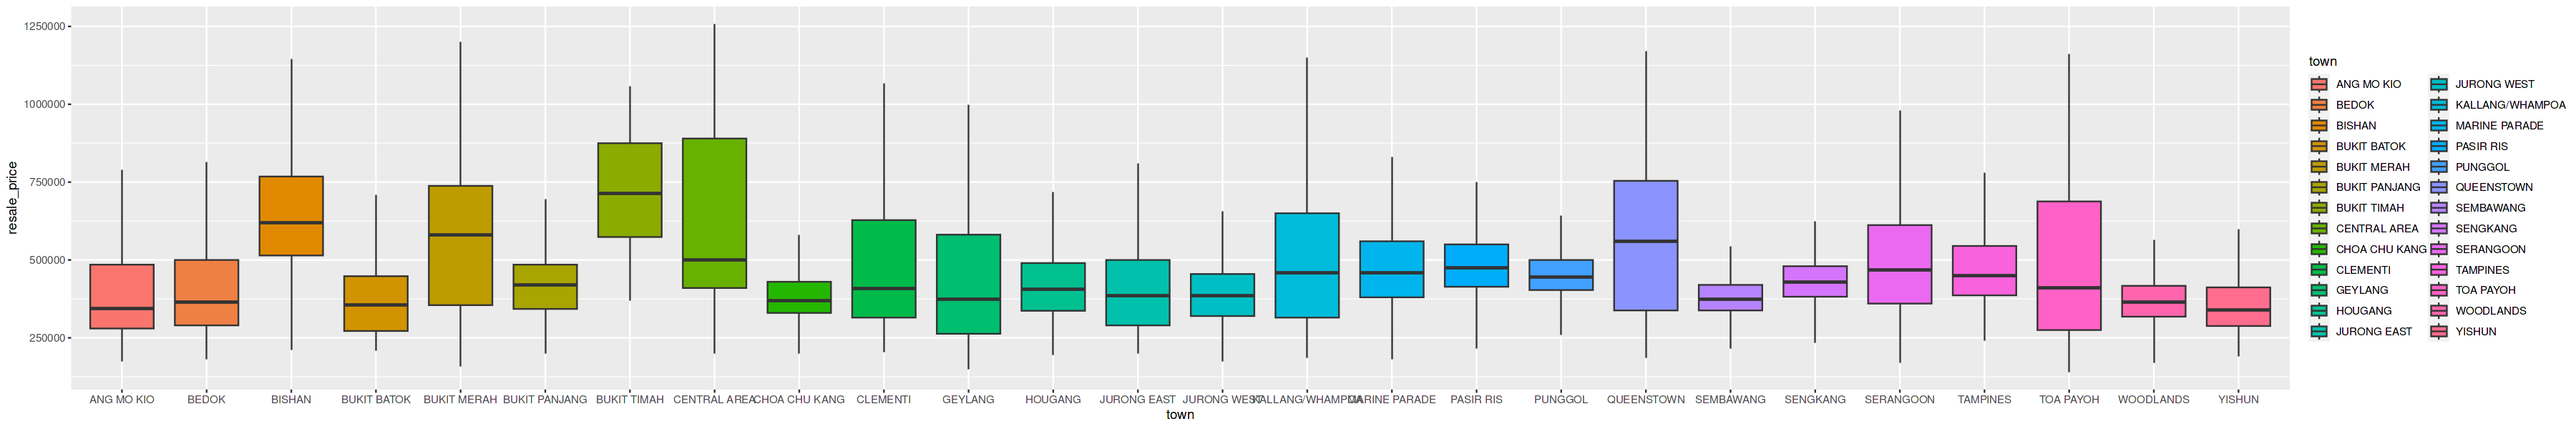

In [18]:
options(repr.plot.width=30, repr.plot.height=5)

ggplot(price2017, aes(x = town, y = resale_price, fill = town)) +
  geom_boxplot(outlier.shape = NA) 
  labs(title = "Boxplots of Resale Prices by Town",
       y = "Resale Price",
       fill = "Town") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 50, hjust = 1))


1. Bishan, Bukit Merah, Bukit Timah, Central Area and Queenstown have median resale prices of 500k dollars and above.
2. Central Area, Queenstown and Toa Payoh has the highest variabilities in the resale prices.
3. Sembawang has the lowest variability in resale price.
4. Central Area and Toa Payoh exhibit a notable presence of outliers

# I have came up with a linear regression model to help predict the resale price of a flat based on the town, flat type and floor area.

In [19]:
price2017 <- within(price2017, {
  town <- as.factor(town)
  flat_type <- as.factor(flat_type)
})


lm_model <- lm(resale_price ~ town + flat_type + floor_area_sqm, data = price2017)

summary(lm_model)


Call:
lm(formula = resale_price ~ town + flat_type + floor_area_sqm, 
    data = price2017)

Residuals:
    Min      1Q  Median      3Q     Max 
-278752  -56282   -9829   42999  553733 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -23267.50   14336.37  -1.623    0.105    
townBEDOK                  -25933.23    1933.13 -13.415  < 2e-16 ***
townBISHAN                 113819.96    2639.18  43.127  < 2e-16 ***
townBUKIT BATOK            -82036.27    2135.68 -38.412  < 2e-16 ***
townBUKIT MERAH            133049.57    2115.19  62.902  < 2e-16 ***
townBUKIT PANJANG          -81929.60    2110.82 -38.814  < 2e-16 ***
townBUKIT TIMAH            178485.30    5968.81  29.903  < 2e-16 ***
townCENTRAL AREA           207989.86    3645.55  57.053  < 2e-16 ***
townCHOA CHU KANG         -150154.24    2098.34 -71.559  < 2e-16 ***
townCLEMENTI                54086.20    2482.96  21.783  < 2e-16 ***
townGEYLANG                 15570.35   

Analysis:
1. The multiple R-squared and adjusted R-squared is 0.6782, indicates that the model has a good fit and that approximately 68.73% of the variability in resale prices is explained by the combination of town, flat type, and floor area.

2. p-value of 2.2e-16 suggest high significance and each of these predictor variables is highly statistically significant in predicting resale prices and are all important factors influencing the resale prices in the model.

For buyers who are on a budget constraint:
- Consider a 3-room flat situated on 01-03 storeys or above 13 storeys,
- In the following estates: Ang Mo Kio, Bedok, Bukit Batok, Bukit Panjang, Choa Chu Kang, Clementi, Geylang, Hougang, Jurong East, Jurong West, Kallang/Whampoa, Marine Parade, Pasir Ris, Punggol, Sembawang, Sengkang, Serangoon, Tampines, Toa Payoh, Woodlands and Yishun
